# 4 Exercise 1

Time to work on a hands-on exercise. In groups of 3 you will analyse the motion of a floating wind turbine subject to irregular waves. In this exercise we will assume that the tower is rigid and the turbine is in parked conditions, that is, no effect of wave loading.

<img src="https://wes.copernicus.org/articles/3/693/2018/wes-3-693-2018-avatar-web.png" alt="drawing" style="width:400px;margin:auto"/>

*Source: Pegalajar-Jurado, A. et al. An efficient frequency-domain model for quick load analysis of floating offshore wind turbines, Wind Energ. Sci., 3, 693–712, 2018*

To further simplify the problem, we consider the following additional assumptions:
- Neglect added mass and added damping
- Prescribed mass and global rotational inertia
- Mooring acts as a spring for the horizontal and vertical displacement and rotation at the CoG

Under these assumptions, the simplified equations of motion are:
$$ \left[\begin{matrix} m&0&0\\0&m&0\\0&0&J\end{matrix}\right]\left[\begin{matrix} \ddot{u}_y\\\ddot{u}_z\\\ddot{\theta}\end{matrix}\right]+\left[\begin{matrix} k_x&0&0\\0&k_y&0\\0&0&k_\theta\end{matrix}\right]\left[\begin{matrix} u_x\\u_z\\\theta\end{matrix}\right]=\left[\begin{matrix} F_x(t)\\F_y(t)\\0\end{matrix}\right]$$

## Step 1: Identify appropriate parameters and loading

In groups, discuss:
1. What are the appropriate values of mass $m$ and inertia $J$ for the floater of a floating wind turbine. 
2. Identify appropriate values for the stiffnes of the mooring system. 
3. Determine the loading from wave and current.

There is no need for correct values, just right order of magnitude.

> **Advanced students**
>
> Following the **Tutorial 2** `5_Tutorial2.ipynb` provided in the sources of the repository, determine the wave loading from a JONSWAP spectrum for a significant wave height $H_s$ and peak period $T_p$ of your choice.

In [1]:
pip install ipympl;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.3/510.3 kB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 29.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 31.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 kB 36.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 24.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [21]:
# Your code goes here

# Let's consider a cylindrical floater of dimensions:
d = 40   # diameter [m]
H = 30   # height [m]
td = 0.1 # wall thickness [m]

# Let's assume is made out of steel
rho = 7800 # density steel [kg/m3]
m = (2*(np.pi*(d/2)**2) + H*2*np.pi*(d/2))*td*rho # Mass of the floater
J = m*(3*(d**2) + H**2)/12  # Approximated inertia (it should be computed differently)

# Initial position
draft = m/1025  # Draft of the floater at rest
uz0 = 0
ux0 = 0
theta0 = 0
z0 = draft - H/2 # Initial vertical displacement of the floater at rest (with respect to the water)

# Mooring stiffness
kx = 1e7   # [N/m]
kz = 5.2e7 # [N/m]
kr = 6.5e9 # [N/rad]
g = 9.81

# Loading
def Fx(t):
    return 0.5*1.0*d*1025*(1.0**2)                       # Morison formula for 1.0m/s velocity
def Fz(t):
    return 0.5*np.cos(0.3*t)*1025*g*( np.pi*(d/2)**2 )      # Wave of 0.5m height

## Step 2: define the ODE function

Define the ODE function `fun` that given the state vector at a given time $\boldsymbol{q}_n$, returns its derivative $\dot{\boldsymbol{q}}_n$.

In [22]:
# Your code goes here
def q_dot(t,q):
    ux = q[0]
    uz = q[1]
    theta = q[2]
    vx = q[3]
    vz = q[4]
    dtheta = q[5]
    ax = (Fx(t) - kx*ux)/m
    az = (Fz(t) - kz*uz)/m
    ddtheta = -kr*theta/J
    return [vx, vz, dtheta, ax, az, ddtheta]

## Step 3: solve the problem

Using the build-in solver `scipy.integrate.solve_ivp` solve the problem

> **Advanced students**
>
> Define your own ODE solver based on what we saw in **Tutorial 1** and compare solutions

In [27]:
# Your code goes here
q0 = [ux0,uz0,theta0,0,0,0]
tspan = np.linspace(0,100,1000)
sol = solve_ivp(fun=q_dot,t_span=[0,100],y0=q0,t_eval=tspan)

## Step 4: plot the time evolution

Plot the time evolution of the vertical displacement and rotation of the barge.

> **Advanced students**
>
> Using a Fourier Transform `FFT`, plot the spectra of the incoming wave and the response of the structure. Do you see any relation?

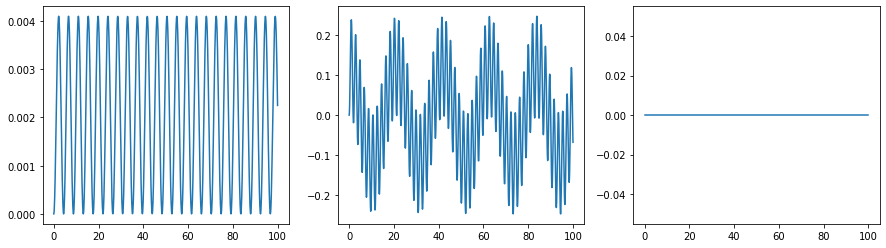

In [38]:
# Your code goes here

# Plotting the solution
fig,ax = plt.subplots(ncols=3,figsize=(15,4))
ax[0].plot(sol.t,sol.y[0])
ax[1].plot(sol.t,sol.y[1])
ax[2].plot(sol.t,sol.y[2])

## Step 5: analysis

Play with the input parameters to answer the following questions:
- How does the mass of the barge influence the solution?
- How does the inertia of the barge influence the solution?

In [ ]:
# Your code goes here